In [5]:
import numpy as np
arrange = np.arange(10,20)
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel(r'E:\Data Science\Assignment1\loan.xlsx')
print(df)

    Sex        Age  Time_at_address Res_status  Telephone Occupation  \
0     M  50.750000            0.585      owner      given  unemploye   
1     M  19.670000           10.000       rent  not_given   labourer   
2     F  52.830002           15.000      owner      given  creative_   
3     M  22.670000            2.540       rent  not_given  creative_   
4     M  29.250000           13.000      owner      given     driver   
..   ..        ...              ...        ...        ...        ...   
424   M  34.169998            2.750      owner      given  guard_etc   
425   F  22.250000            1.250       rent  not_given  unemploye   
426   M  23.330000            1.500      owner      given  creative_   
427   M  21.000000            4.790       rent  not_given  productio   
428   M  27.750000            1.290      owner      given   labourer   

    Job_status  Time_employed  Time_bank Liab_ref    Acc_ref  Home_Expn  \
0    unemploye              0          0        f      given

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le_Sex = LabelEncoder()
le_Res_status = LabelEncoder()
le_Telephone = LabelEncoder()
le_Occupation = LabelEncoder()
le_Job_status = LabelEncoder()
le_Liab_ref = LabelEncoder()
le_Acc_ref = LabelEncoder()
le_Decision = LabelEncoder()

In [9]:
df['Sex_n'] = le_Sex.fit_transform(df['Sex'])
df['Res_status_n'] = le_Res_status.fit_transform(df['Res_status'])
df['Telephone_n'] = le_Telephone.fit_transform(df['Telephone'])
df['Occupation_n'] = le_Occupation.fit_transform(df['Occupation'])
df['Job_status_n'] = le_Job_status.fit_transform(df['Job_status'])
df['Liab_ref_n'] = le_Liab_ref.fit_transform(df['Liab_ref'])
df['Acc_ref_n'] = le_Acc_ref.fit_transform(df['Acc_ref'])
df['Decision_n'] = le_Acc_ref.fit_transform(df['Decision'])
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,...,Balance,Decision,Sex_n,Res_status_n,Telephone_n,Occupation_n,Job_status_n,Liab_ref_n,Acc_ref_n,Decision_n
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,...,0,reject,1,0,0,11,6,0,0,1
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,...,0,reject,1,1,1,4,0,1,0,1
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,...,2200,accept,0,0,0,0,2,0,0,0
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,...,0,accept,1,1,1,0,0,0,0,0
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,...,0,reject,1,0,0,1,0,0,0,1


In [10]:
data = df.drop(['Sex','Res_status','Telephone','Occupation','Job_status','Liab_ref','Acc_ref'],axis="columns")
data

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_n,Res_status_n,Telephone_n,Occupation_n,Job_status_n,Liab_ref_n,Acc_ref_n,Decision_n
0,50.750000,0.585,0,0,145,0,reject,1,0,0,11,6,0,0,1
1,19.670000,10.000,0,0,140,0,reject,1,1,1,4,0,1,0,1
2,52.830002,15.000,5,14,0,2200,accept,0,0,0,0,2,0,0,0
3,22.670000,2.540,2,0,0,0,accept,1,1,1,0,0,0,0,0
4,29.250000,13.000,0,0,228,0,reject,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,reject,1,0,0,3,4,1,0,1
425,22.250000,1.250,3,0,280,0,reject,0,1,1,11,6,0,0,1
426,23.330000,1.500,1,0,422,200,accept,1,0,0,0,0,0,0,0
427,21.000000,4.790,2,1,80,300,accept,1,1,1,7,2,1,0,0


In [11]:
y = data['Decision_n']
x = data[['Age','Time_at_address','Time_employed','Time_bank','Home_Expn','Balance','Sex_n','Res_status_n','Telephone_n','Occupation_n','Job_status_n','Liab_ref_n','Acc_ref_n']]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train) 

RandomForestClassifier()

In [24]:
model.score(x_test,y_test)

0.7407407407407407

In [25]:
y_predicted = model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[32, 19],
       [ 9, 48]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

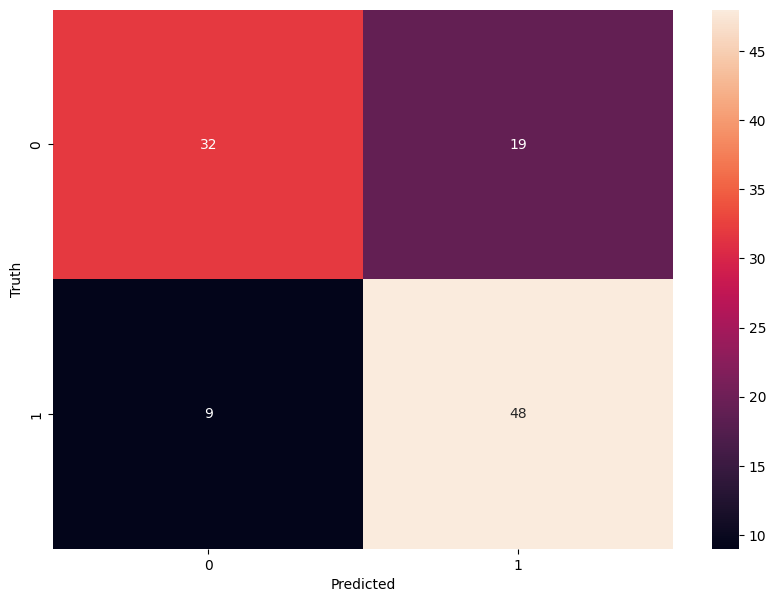

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')